In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn') 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# 폰트 관련
#from matplotlib import font_manager, rc
'''
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
'''

plt.rcParams["font.family"] = "NGULIM.TTF"
plt.rcParams["font.size"] = 50
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15

In [2]:
data = pd.read_excel('seoul_crime_data.xlsx')
data

,자치구,합계_발생,합계_검거,살인_발생,살인_검거,강도_발생,강도_검거,강간강제추행_발생,강간강제추행_검거,절도_발생,절도_검거,폭력_발생,폭력_검거
0,종로구,19154,20108,32,33,39,53,1157,5616,7765,4907,10161,9499
1,중구,20536,13725,10,8,39,38,1053,655,9695,4548,9739,8476
2,용산구,17890,12981,14,12,26,26,1411,1211,6041,2825,10398,8907
3,성동구,13124,9822,18,18,23,29,610,480,5353,3002,7120,6293
4,광진구,21495,14717,23,21,36,24,1297,1063,10164,5081,9975,8528
5,동대문구,19535,15148,34,31,34,35,829,704,7905,4558,10733,9820
6,중랑구,21894,16468,37,36,29,32,831,700,7922,4538,13075,11162
7,성북구,15664,11698,25,23,23,23,828,642,6048,3374,8740,7636
8,강북구,17667,14172,38,34,27,22,948,724,5357,3064,11297,10328
9,도봉구,10975,8245,6,6,20,18,512,523,3931,2113,6506,5585


In [3]:
df = data[['자치구','합계_발생','살인_발생','강도_발생','강간강제추행_발생','절도_발생','폭력_발생']]
df.columns = ['GU','Total','Murder','Robbery','Rape','Theft','Violence']
df['GU'] = df['GU'].str[:-1]
df.set_index('GU', inplace=True)
df.head()

,Total,Murder,Robbery,Rape,Theft,Violence
GU,,,,,,
종로,19154,32,39,1157,7765,10161
중,20536,10,39,1053,9695,9739
용산,17890,14,26,1411,6041,10398
성동,13124,18,23,610,5353,7120
광진,21495,23,36,1297,10164,9975


<AxesSubplot:>

findfont: Font family ['NGULIM.TTF'] not found. Falling back to DejaVu Sans.


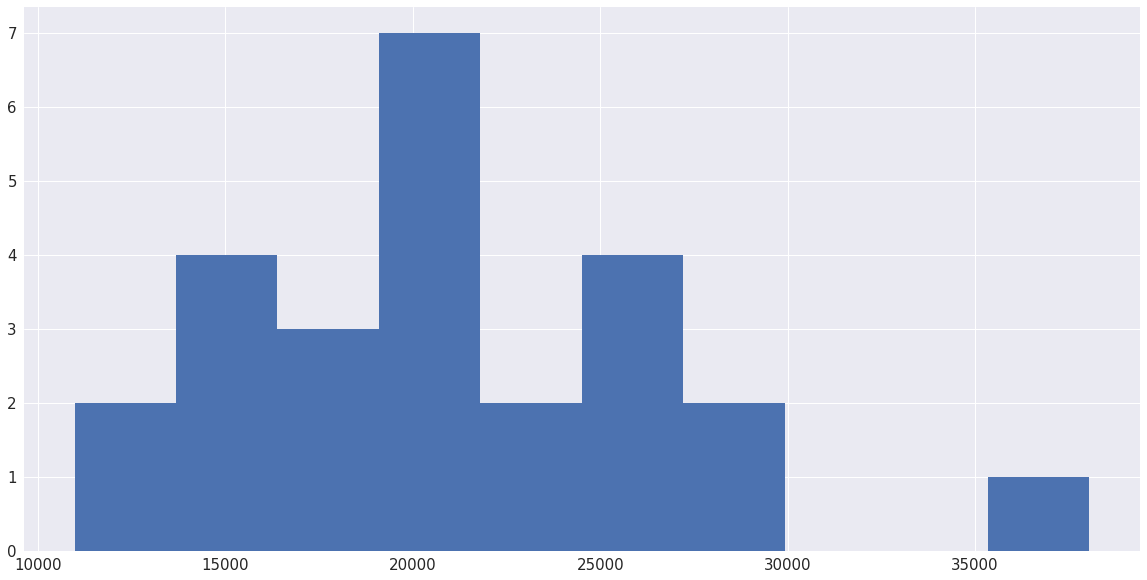

In [4]:
q = np.quantile(df['Total'], [0.2, 0.4, 0.6, 0.8])
df['Total'].hist()

In [5]:
df['Total_level'] = 0
df.loc[df['Total']<=q[0],'Total_level'] = 'A'
df.loc[(df['Total']>q[0])&(df['Total']<=q[1]),'Total_level'] = 'B'
df.loc[(df['Total']>q[1])&(df['Total']<=q[2]),'Total_level'] = 'C'
df.loc[(df['Total']>q[2])&(df['Total']<=q[3]),'Total_level'] = 'D'
df.loc[df['Total']>q[3],'Total_level'] = 'E'

<AxesSubplot:>

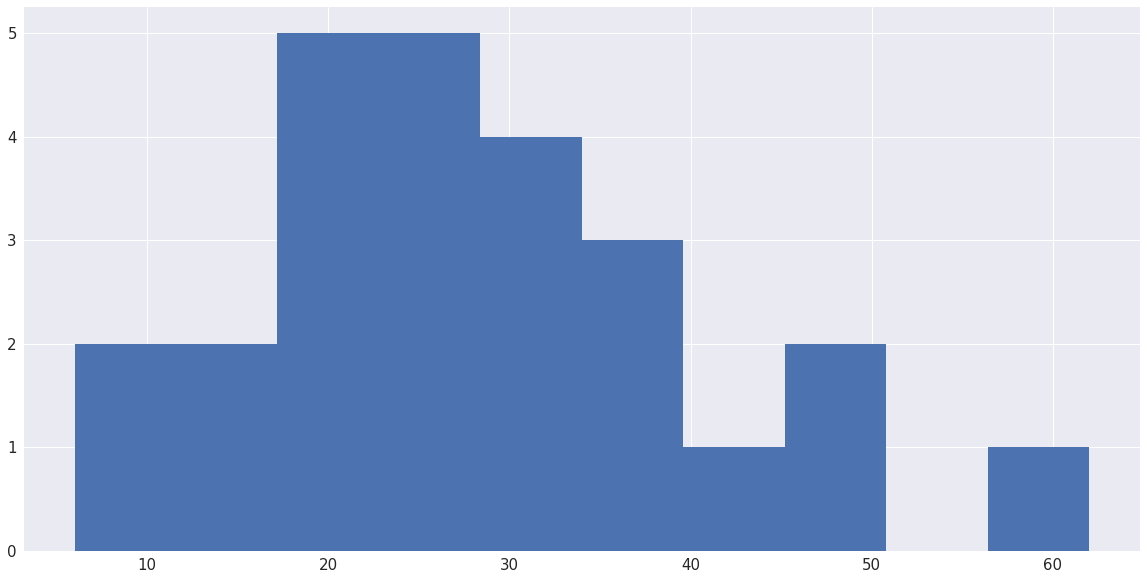

In [6]:
q = np.quantile(df['Murder'], [0.2, 0.4, 0.6, 0.8])
df['Murder'].hist()

In [7]:
df['Murder_level'] = 0
df.loc[df['Murder']<=q[0],'Murder_level'] = 'A'
df.loc[(df['Murder']>q[0])&(df['Murder']<=q[1]),'Murder_level'] = 'B'
df.loc[(df['Murder']>q[1])&(df['Murder']<=q[2]),'Murder_level'] = 'C'
df.loc[(df['Murder']>q[2])&(df['Murder']<=q[3]),'Murder_level'] = 'D'
df.loc[df['Murder']>q[3],'Murder_level'] = 'E'

<AxesSubplot:>

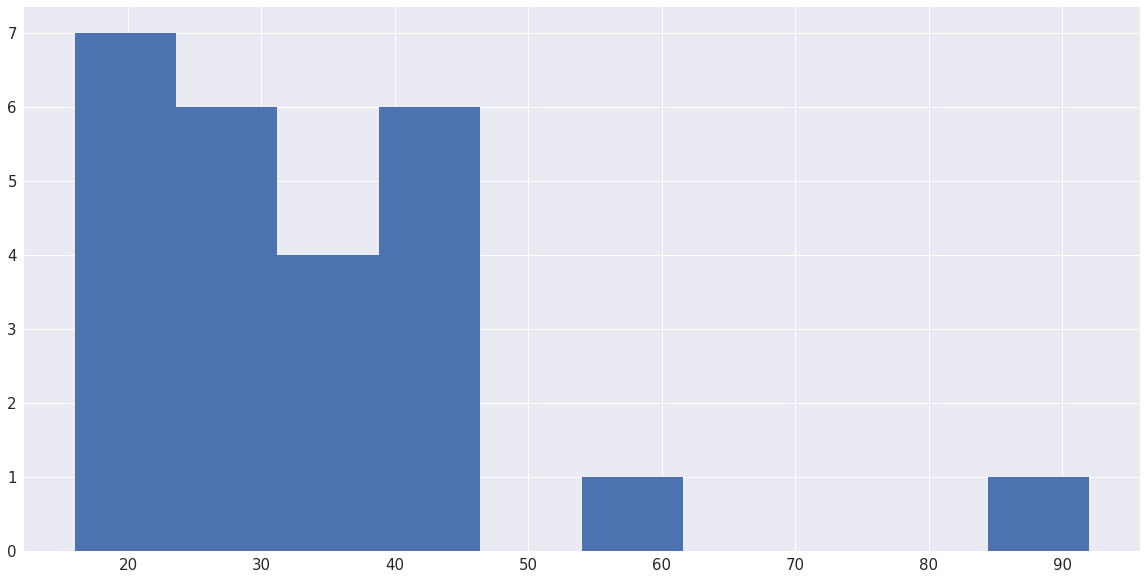

In [8]:
q = np.quantile(df['Robbery'], [0.2, 0.4, 0.6, 0.8])
df['Robbery'].hist()

In [9]:
df['Robbery_level'] = 0
df.loc[df['Robbery']<=q[0],'Robbery_level'] = 'A'
df.loc[(df['Robbery']>q[0])&(df['Robbery']<=q[1]),'Robbery_level'] = 'B'
df.loc[(df['Robbery']>q[1])&(df['Robbery']<=q[2]),'Robbery_level'] = 'C'
df.loc[(df['Robbery']>q[2])&(df['Robbery']<=q[3]),'Robbery_level'] = 'D'
df.loc[df['Robbery']>q[3],'Robbery_level'] = 'E'

<AxesSubplot:>

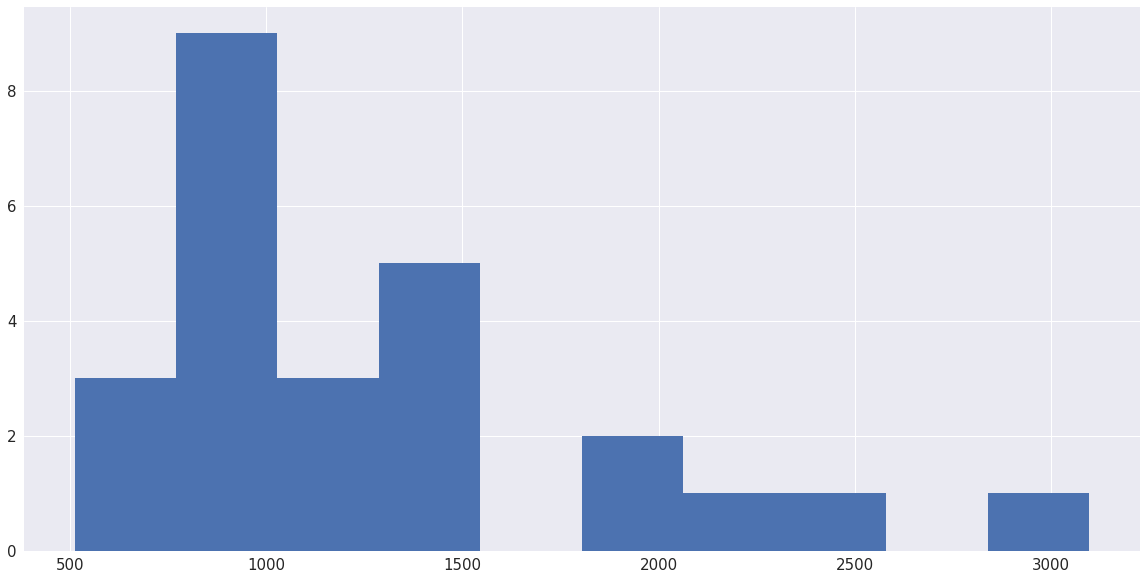

In [10]:
q = np.quantile(df['Rape'], [0.2, 0.4, 0.6, 0.8])
df['Rape'].hist()

In [11]:
df['Rape_level'] = 0
df.loc[df['Rape']<=q[0],'Rape_level'] = 'A'
df.loc[(df['Rape']>q[0])&(df['Rape']<=q[1]),'Rape_level'] = 'B'
df.loc[(df['Rape']>q[1])&(df['Rape']<=q[2]),'Rape_level'] = 'C'
df.loc[(df['Rape']>q[2])&(df['Rape']<=q[3]),'Rape_level'] = 'D'
df.loc[df['Rape']>q[3],'Rape_level'] = 'E'

<AxesSubplot:>

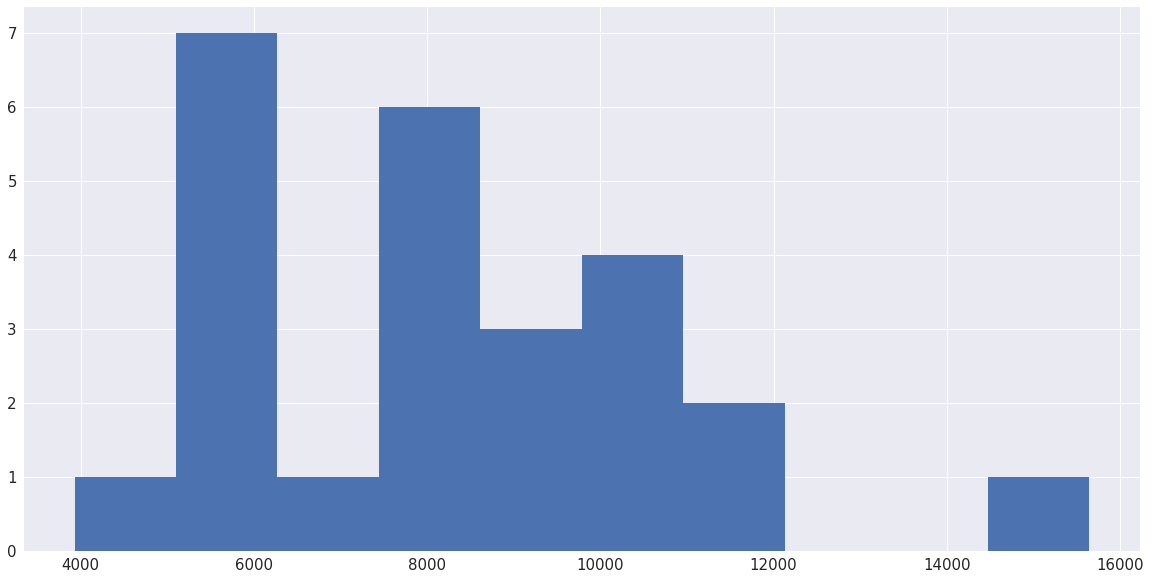

In [12]:
q = np.quantile(df['Theft'], [0.2, 0.4, 0.6, 0.8])
df['Theft'].hist()

In [13]:
df['Theft_level'] = 0
df.loc[df['Theft']<=q[0],'Theft_level'] = 'A'
df.loc[(df['Theft']>q[0])&(df['Theft']<=q[1]),'Theft_level'] = 'B'
df.loc[(df['Theft']>q[1])&(df['Theft']<=q[2]),'Theft_level'] = 'C'
df.loc[(df['Theft']>q[2])&(df['Theft']<=q[3]),'Theft_level'] = 'D'
df.loc[df['Theft']>q[3],'Theft_level'] = 'E'

<AxesSubplot:>

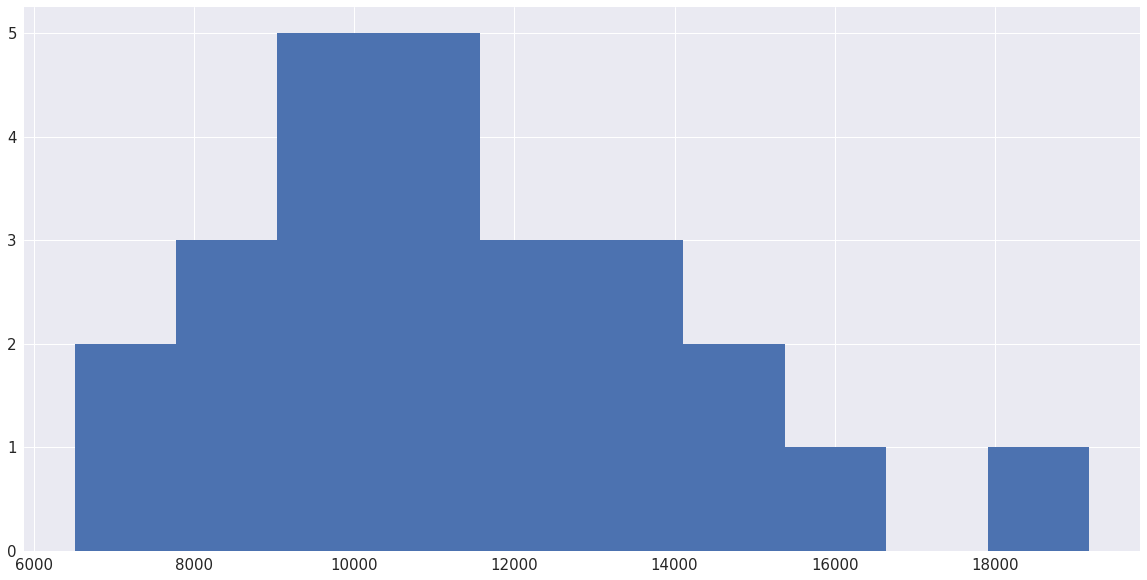

In [14]:
q = np.quantile(df['Violence'], [0.2, 0.4, 0.6, 0.8])
df['Violence'].hist()

In [15]:
df['Violence_level'] = 0
df.loc[df['Violence']<=q[0],'Violence_level'] = 'A'
df.loc[(df['Violence']>q[0])&(df['Violence']<=q[1]),'Violence_level'] = 'B'
df.loc[(df['Violence']>q[1])&(df['Violence']<=q[2]),'Violence_level'] = 'C'
df.loc[(df['Violence']>q[2])&(df['Violence']<=q[3]),'Violence_level'] = 'D'
df.loc[df['Violence']>q[3],'Violence_level'] = 'E'

In [16]:
df

,Total,Murder,Robbery,Rape,Theft,Violence,Total_level,Murder_level,Robbery_level,Rape_level,Theft_level,Violence_level
GU,,,,,,,,,,,,
종로,19154,32,39,1157,7765,10161,B,D,D,C,C,B
중,20536,10,39,1053,9695,9739,C,A,D,C,D,B
용산,17890,14,26,1411,6041,10398,B,A,B,D,A,C
성동,13124,18,23,610,5353,7120,A,A,A,A,A,A
광진,21495,23,36,1297,10164,9975,D,B,D,D,D,B
동대문,19535,34,34,829,7905,10733,C,D,C,A,C,C
중랑,21894,37,29,831,7922,13075,D,D,C,B,C,D
성북,15664,25,23,828,6048,8740,A,C,A,A,B,A
강북,17667,38,27,948,5357,11297,B,E,C,C,A,C


In [17]:
df.to_csv('seoul_crime_label.csv')